Universidade Federal do Rio Grande do Sul (UFRGS)   
Programa de Pós-Graduação em Engenharia Civil (PPGEC)   

# PEC00144: Experimental Methods in Civil Engineering

### Estimating Young's Module through axial vibration frequency  

---
_Prof. Marcelo M. Rocha, Dr.techn._ [(ORCID)](https://orcid.org/0000-0001-5640-1020)  
_Porto Alegre, RS, Brazil_ 


In [2]:
# Importing Python modules required for this notebook
# (this cell must be executed with "shift+enter" before any other Python cell)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## 1. Theoretical background



In [149]:
L = 1.00
n = 1024

x     =  np.linspace(0, L, n)
alpha =  np.linspace(0, 1, n)
beta  =  np.array([0.001, 0.1, 0.3, 0.5, 1.0, 2.0, 5.0, 10., 20., 50., 100.])

phi1  =  lambda x:  np.sin(np.pi*x/L/2)
phi2  =  lambda x:  x/L

eps1  =  lambda x: (np.pi/L/2)*np.cos(np.pi*x/L/2)
eps2  =  lambda x:  np.ones(x.shape)/L

f     =  np.empty((len(beta), len(alpha)))
fk    =  np.empty( len(beta) )
ak    =  np.empty( len(beta) )


Text(0, 0.5, 'frequency by (1/L).sqrt(E/rho)')

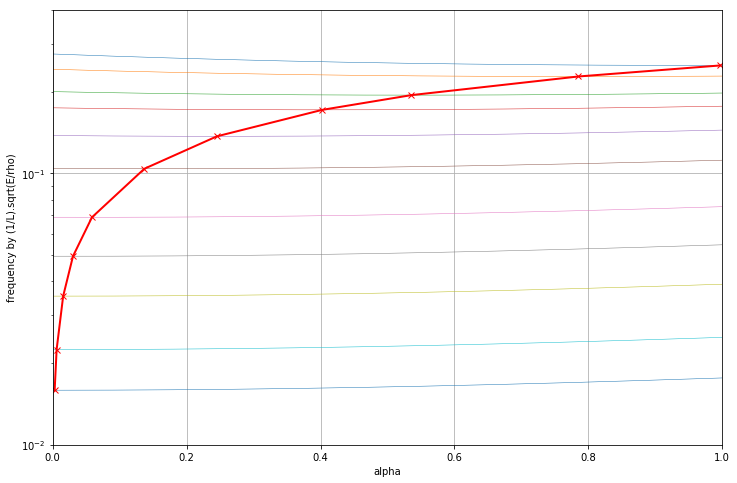

In [150]:
plt.figure(1, figsize=(12,8), clear=True)

for kb, b in enumerate(beta):

    for ka, a in enumerate(alpha):

        phi  =  a*phi1(x) + (1 - a)*phi2(x)
        eps  =  a*eps1(x) + (1 - a)*eps2(x)

        V    =  np.trapz(eps**2, x)
        Tr   =  np.trapz(phi**2, x) + b*L

        f[kb,ka] =  L*np.sqrt(V/Tr)/2/np.pi
        
    ik     =  np.argmin(f[kb,:]) 
    fk[kb] =  f[kb,ik]
    ak[kb] =  alpha[ik]
    
    plt.semilogy(alpha, f[kb,:], lw=0.5)
    plt.semilogy(ak[kb], fk[kb], 'rx')

plt.semilogy(ak, fk, 'r', lw=2)
plt.grid(True)
plt.axis([0, 1, 1e-2, 4e-1])
plt.xlabel('alpha')
plt.ylabel('frequency by (1/L).sqrt(E/rho)')


In [151]:
2*np.pi*fk


array([1.56922711, 1.42887884, 1.2199717 , 1.07689181, 0.86034294,
       0.65327427, 0.43284118, 0.31105294, 0.22176042, 0.14095168,
       0.09983364])